<a href="https://colab.research.google.com/github/karaage0703/covid19_memo/blob/master/covid19_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 新型コロナウイルスの感染状況を分析するためのノートブック

データを可視化するために、個人的に作成しているものです。

内容の正確性を保証するものではありませんので、ご注意下さい。


以下リポジトリでPR受付中です。

https://github.com/karaage0703/covid19_memo

# 変更履歴
- 2020/03/07 13:42 データ更新

## データのダウンロード

以下のオープンデータを使用（Google Spread Sheet)

https://docs.google.com/spreadsheets/d/1jfB4muWkzKTR0daklmf8D5F0Uf_IYAgcx_-Ij9McClQ/edit#gid=0

In [1]:
!wget --no-check-certificate --output-document=covid19jp.csv 'https://docs.google.com/spreadsheets/d/1jfB4muWkzKTR0daklmf8D5F0Uf_IYAgcx_-Ij9McClQ/export?gid=0&format=csv'

--2020-03-07 04:42:54--  https://docs.google.com/spreadsheets/d/1jfB4muWkzKTR0daklmf8D5F0Uf_IYAgcx_-Ij9McClQ/export?gid=0&format=csv
Resolving docs.google.com (docs.google.com)... 173.194.217.139, 173.194.217.100, 173.194.217.101, ...
Connecting to docs.google.com (docs.google.com)|173.194.217.139|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘covid19jp.csv’

covid19jp.csv           [ <=>                ]  75.03K  --.-KB/s    in 0.006s  

2020-03-07 04:42:55 (12.2 MB/s) - ‘covid19jp.csv’ saved [76835]



## データ読み込みと確認

データをpandasを使って読み込み、内容を確認する

pandasで読み込む

In [0]:
import pandas as pd
data = pd.read_csv('covid19jp.csv')

データが読み込めているか確認

In [3]:
data.head()

,Patient Number,Date Announced,Date Added,Age Bracket,Gender,"Residence City, Prefecture",Detected City,Detected Prefecture,Status,Click Here For Sheet Information,Notes,Source(s),Related Patients,MHLW (New) Patient Number,MHLW (Orig) Patient Number,Hokkaido Patient Number,Tokyo Patient Number,Osaka Patient Number,Charter Flight Passenger,Cruise Passenger (Disembarked),Cruise Passenger (Infected Onboard),Cruise Quarantine Officer
0,1.0,2020-01-30,2020-01-30,50,M,"Wuhan, China",NaN,Unspecified,Discharged,NaN,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,NaN,9.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
1,2.0,2020-02-01,2020-02-01,40,M,Unspecified,NaN,Unspecified,Discharged,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_09531.html,3,NaN,14.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
2,3.0,2020-02-01,2020-02-01,40,M,China,NaN,Unspecified,Discharged,NaN,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,2,NaN,15.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
3,4.0,2020-02-01,2020-02-01,40,M,"Wuhan, China",NaN,Unspecified,Discharged,NaN,Japanese lives in China,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,NaN,16.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN
4,5.0,2020-02-04,2020-02-04,50,F,Chiba,NaN,Unspecified,Discharged,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,NaN,18.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN


データのチェック

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 419 entries, 0 to 418
Data columns (total 22 columns):
Patient Number                         411 non-null float64
Date Announced                         416 non-null object
Date Added                             416 non-null object
Age Bracket                            401 non-null object
Gender                                 403 non-null object
Residence City, Prefecture             359 non-null object
Detected City                          265 non-null object
Detected Prefecture                    415 non-null object
Status                                 172 non-null object
Click Here For Sheet Information       1 non-null object
Notes                                  239 non-null object
Source(s)                              390 non-null object
Related Patients                       92 non-null object
MHLW (New) Patient Number              237 non-null object
MHLW (Orig) Patient Number             312 non-null float64
Hokkaido Pa

欠損値のチェック

In [5]:
data.isna().sum()

Patient Number                           8
Date Announced                           3
Date Added                               3
Age Bracket                             18
Gender                                  16
Residence City, Prefecture              60
Detected City                          154
Detected Prefecture                      4
Status                                 247
Click Here For Sheet Information       418
Notes                                  180
Source(s)                               29
Related Patients                       327
MHLW (New) Patient Number              182
MHLW (Orig) Patient Number             107
Hokkaido Patient Number                337
Tokyo Patient Number                   389
Osaka Patient Number                   406
Charter Flight Passenger               405
Cruise Passenger (Disembarked)         411
Cruise Passenger (Infected Onboard)    414
Cruise Quarantine Officer              409
dtype: int64

愛知県に住んでいる人を抽出

In [6]:
aichi_data = data[(data['Detected Prefecture'] == 'Aichi')]
aichi_data.head()

,Patient Number,Date Announced,Date Added,Age Bracket,Gender,"Residence City, Prefecture",Detected City,Detected Prefecture,Status,Click Here For Sheet Information,Notes,Source(s),Related Patients,MHLW (New) Patient Number,MHLW (Orig) Patient Number,Hokkaido Patient Number,Tokyo Patient Number,Osaka Patient Number,Charter Flight Passenger,Cruise Passenger (Disembarked),Cruise Passenger (Infected Onboard),Cruise Quarantine Officer
17,18.0,2020-01-26,2020-01-26,40,M,"Wuhan, China",NaN,Aichi,NaN,NaN,Chinese traveler,https://www.mhlw.go.jp/stf/newpage_09531.html,28,4,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18,19.0,2020-01-28,2020-01-28,40,M,"Wuhan, China",NaN,Aichi,Hospitalized,NaN,Chinese traveler,https://www.mhlw.go.jp/stf/newpage_09531.html,NaN,5,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39,40.0,2020-02-14,2020-02-14,60,M,"Nagoya, Aichi",NaN,Aichi,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_09539.html,NaN,26,35.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
47,48.0,2020-02-15,2020-02-15,60,F,Aichi,Nagoya,Aichi,NaN,NaN,NaN,https://www.mhlw.go.jp/stf/newpage_09545.html,35,34,43.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,49.0,2020-02-16,2020-02-16,60,M,Aichi,NaN,Aichi,NaN,NaN,NaN,https://www.mhlw.go.jp/content/10906000/000596...,42,35,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


データのチェック

In [7]:
aichi_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 63 entries, 17 to 386
Data columns (total 22 columns):
Patient Number                         63 non-null float64
Date Announced                         63 non-null object
Date Added                             63 non-null object
Age Bracket                            63 non-null object
Gender                                 63 non-null object
Residence City, Prefecture             61 non-null object
Detected City                          52 non-null object
Detected Prefecture                    63 non-null object
Status                                 14 non-null object
Click Here For Sheet Information       0 non-null object
Notes                                  10 non-null object
Source(s)                              59 non-null object
Related Patients                       19 non-null object
MHLW (New) Patient Number              32 non-null object
MHLW (Orig) Patient Number             51 non-null float64
Hokkaido Patient Number 

欠損値のチェック

In [8]:
aichi_data.isna().sum()

Patient Number                          0
Date Announced                          0
Date Added                              0
Age Bracket                             0
Gender                                  0
Residence City, Prefecture              2
Detected City                          11
Detected Prefecture                     0
Status                                 49
Click Here For Sheet Information       63
Notes                                  53
Source(s)                               4
Related Patients                       44
MHLW (New) Patient Number              31
MHLW (Orig) Patient Number             12
Hokkaido Patient Number                63
Tokyo Patient Number                   63
Osaka Patient Number                   63
Charter Flight Passenger               63
Cruise Passenger (Disembarked)         63
Cruise Passenger (Infected Onboard)    63
Cruise Quarantine Officer              63
dtype: int64

## 感染者数の分析
### 準備

matplotlibをインポート






In [0]:
import matplotlib.pyplot as plt

### 年齢別のヒストグラム

- データを読み込む
- 欠損値を除去
- int型に変換
- ヒストグラムの表示

全国のデータ

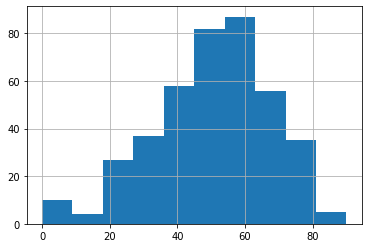

In [10]:
temp_data = data['Age Bracket']
temp_data = temp_data.replace(['Unspecified', 'NaN'])
temp_data = temp_data.dropna(how='all')
temp_data = temp_data.astype('int64')
temp_data.hist()

愛知のデータ

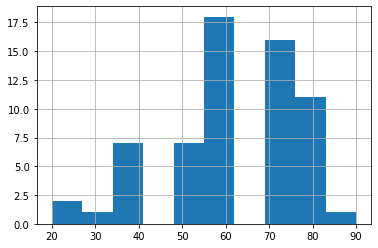

In [11]:
temp_data = aichi_data['Age Bracket']
temp_data = temp_data.replace(['Unspecified', 'NaN'])
temp_data = temp_data.dropna(how='all')
temp_data = temp_data.astype('int64')
temp_data.hist()

### 性別の割合

全国のデータ

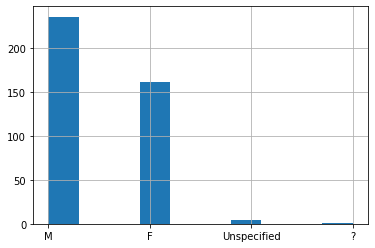

In [12]:
temp_data = data['Gender']
temp_data = temp_data.dropna(how='all')
temp_data.hist()

愛知のデータ

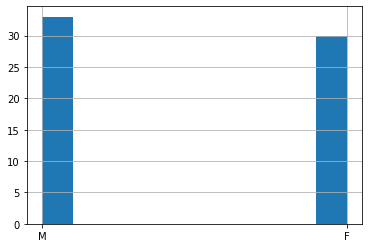

In [13]:
temp_data = aichi_data['Gender']
temp_data = temp_data.dropna(how='all')
temp_data.hist()

#### 陽性患者数（1日当たりの増加数）
全国のデータ

<BarContainer object of 40 artists>

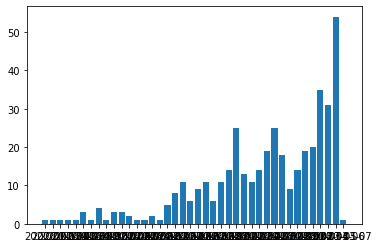

In [14]:
temp_data = data.groupby('Date Announced')['Status'].apply(len)
plt.bar(temp_data.index, temp_data, linewidth=0)

愛知のデータ

<BarContainer object of 21 artists>

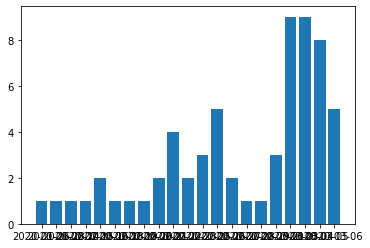

In [15]:
temp_data = aichi_data.groupby('Date Announced')['Status'].apply(len)
plt.bar(temp_data.index, temp_data, linewidth=0)

# References

- https://www.kaggle.com/imdevskp/covid-19-analysis-viz-prediction-comparisons
- https://pythondatascience.plavox.info/matplotlib/%E6%A3%92%E3%82%B0%E3%83%A9%E3%83%95